In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
#set path
path = r'/Users/mdiaz/Desktop/CF/Project 4 Instacart Python/Data/Org/'

In [9]:
#import

df_complete_data= pd.read_pickle(os.path.join(path, 'Prepared Data 4.9', 'df_merged_final.pkl'))

In [10]:
#check the output
df_complete_data.shape

(32434212, 34)

In [11]:
df_complete_data.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Bar Chart 

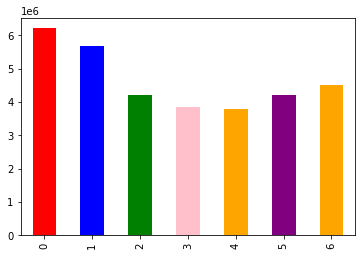

In [12]:
bar = df_complete_data['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'pink', 'orange', 'purple', 'orange'])

# Histogram

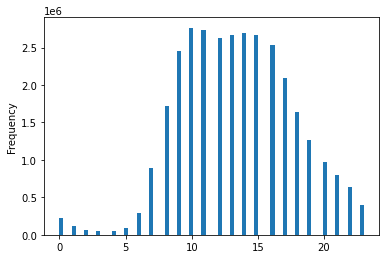

In [13]:
hist = df_complete_data['order_hour_of_day'].plot.hist(bins=75)

# Scatterplot

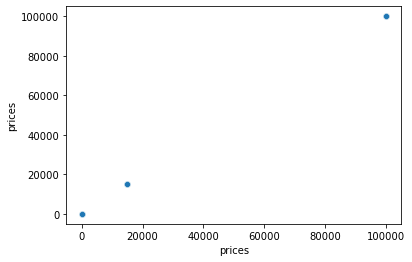

In [14]:
splot = sns.scatterplot(x = 'prices', y = 'prices', data = df_complete_data)

In [15]:
# define the sub set of the df for the line chart (plotting the top 1 million)
# creating a random sampling
np.random.seed(4)

In [16]:
dev = np.random.rand(len(df_complete_data)) <= 0.7

In [17]:
dev

array([False,  True, False, ..., False,  True,  True])

In [18]:
#splitting the dataframe (70% of the sample in the dataframe)
big = df_complete_data[dev]

In [19]:
#splitting the dataframe (30% of the sample in the dataframe)
small = df_complete_data[~dev]

In [20]:
#checking the execution for accuraccy
len(df_complete_data)

32434212

In [23]:
len(big) + len(small)

32434212

In [22]:
# select the columns needed line plot
df_complete_data2 = small[['orders_day_of_week', 'prices']]

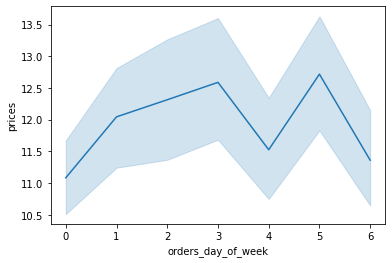

In [48]:
line = sns.lineplot(data = df_complete_data2, x = 'orders_day_of_week',y = 'prices') 

# 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

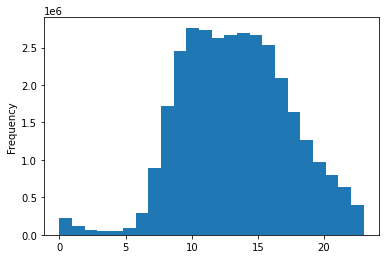

In [43]:
hist_hour = df_complete_data['order_hour_of_day'].plot.hist(bins = 24)

On the X axis, we see the hours of the day (0-23). On the Y axis, the total amount of orders places each hour (millions).

In [36]:
#checking the histogram accuracy
df_complete_data['order_hour_of_day'].value_counts(dropna=False).sort_index()

0      218942
1      115786
2       69431
3       51317
4       53283
5       88057
6      290770
7      891928
8     1719952
9     2456661
10    2764390
11    2738585
12    2620800
13    2663272
14    2691563
15    2664522
16    2537469
17    2089452
18    1637922
19    1259382
20     977017
21     796362
22     634737
23     402612
Name: order_hour_of_day, dtype: int64

#4.The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column. 

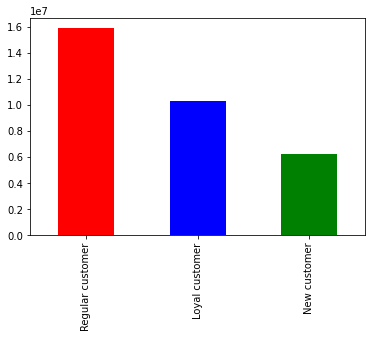

In [37]:
#plotting bar chart for the loyalty flag
loyalty_bar = df_complete_data['loyalty_flag'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

In [38]:
#df_complete_data.info()

5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)¶

In [39]:
#using the earlier splitted data of 30% and selecting the right columns
df_prices_hour = small[['order_hour_of_day', 'prices']]

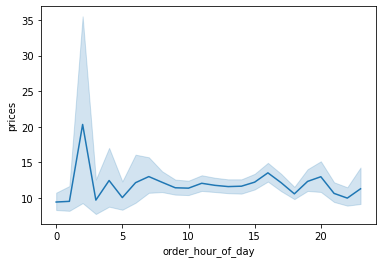

In [44]:
# Create line chart
line2 = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y = 'prices')

6. Conduct exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [45]:
#using the earlier splitted data of 30% and selecting the right columns
df_fam_status_age = small [['no_of_dependents', 'age']]

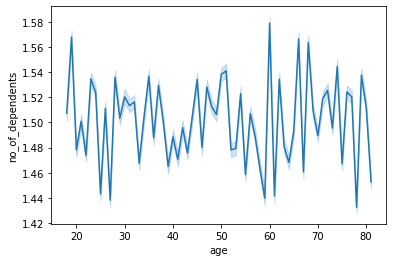

In [47]:
#create line chart
line3 = sns.lineplot(data = df_fam_status_age, x = 'age', y = 'no_of_dependents')

#### The line chart shows the relationship between customer's age and the number of dependents in each family. However, the line does show a distinct relationship between age of instacart customers and the number of dependents. 

7. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [49]:
#using the earlier splitted data of 30% and selecting the right columns
df_income_age = small [['income', 'age']]

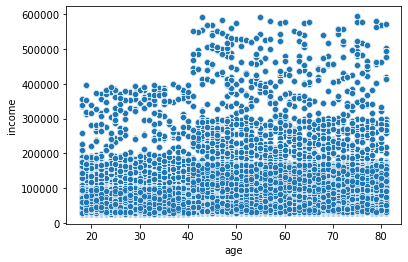

In [50]:
#create scatter plot
plot_spending = sns.scatterplot(x = 'age', y = 'income', data = df_income_age)

The scatterplot shows the relationship between between age and income of instacart customers.

#1. There is a large numbers of customers across all ages that earn up to 200,000 USD.
#2. Customers that are 40 years and olders are earning up to 600,000 USD.
#3. Older - middle aged customers are the highest spenders. 

# Export your visualizations as “.png” files in your relevant project folder.

In [52]:
bar.figure.savefig(os.path.join(path, 'Prepared Data 4.9', 'Visualizations', 'bar_4_9.png'))

In [53]:
hist.figure.savefig(os.path.join(path, 'Prepared Data 4.9', 'Visualizations', 'hist_4_9.png'))

In [54]:
splot.figure.savefig(os.path.join(path, 'Prepared Data 4.9', 'Visualizations', 'splot_4_9.png'))

In [55]:
line.figure.savefig(os.path.join(path, 'Prepared Data 4.9', 'Visualizations', 'line_4_9.png'))

In [56]:
hist_hour.figure.savefig(os.path.join(path, 'Prepared Data 4.9', 'Visualizations', 'hist_hour_4_9.png'))

In [57]:
loyalty_bar.figure.savefig(os.path.join(path, 'Prepared Data 4.9', 'Visualizations', 'loyalty_bar_4_9.png'))

In [58]:
line2.figure.savefig(os.path.join(path, 'Prepared Data 4.9', 'Visualizations', 'line_prices_hour_4_9.png'))

In [59]:
line3.figure.savefig(os.path.join(path, 'Prepared Data 4.9', 'Visualizations', 'line_age_deps_4_9.png'))

In [60]:
plot_spending.figure.savefig(os.path.join(path, 'Prepared Data 4.9', 'Visualizations', 'scatter_spending_power_4_9.png'))